# WeRateDogs DataWrangling Project

## Intro:

*As we all know that real data never comes clean nor does it come organised that is why we use the Data wrangling process, which consists of 3 iterative steps of gathering, assessing and cleaning.
and these issues with the data that need to be assessed and cleaned are conerned with 2 things which are data quality and data tidiness.
that is why we will use Python and its libraries to gather, assess and clean this data from WeRateDogs and then we will try to gain insight into this data and present it through documentation and visualisations.*

*The data that we will be wrangling today is the twitter archive data of WeRateDogs account that we have through a CSV sent to Udacity by WeRateDogs themselves as well as using tweepy and twitter API to get access to extra data like retweeks and favourites.*

## 1st Step Gathering Data:

> we download and add the Twitter archive file manualy that was provided to us by Udacity.

> we download the file that determines the breed of dog by using neural networks from the udacity page programatically. https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

> Accessing Twitter API to get Retweets and Favourites for each tweet in the archive file programatically.

#### Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### opening CSV file as Pandas DataFrame

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Downloading and saving the file for Dog Breeds prediction as Pandas DataFrame

In [5]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
prediction_df = pd.read_csv('image-predictions.tsv',sep='\t')

In [6]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Access and Download Twitter API data then save it to a DataFrame

In [8]:
auth = tweepy.OAuthHandler('SPvyPgi1YjeTLbdTM4fQdIiBF', 'Ztw9Ya6fd5J7YFrB1M23JgwF1fgn0acCYHxncPwI4mqfhnGMFL')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
list_of_tweets = []
cant_find_tweets_ids = []
for tweet_id in archive_df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_ids.append(tweet_id)

Rate limit reached. Sleeping for: 751
Rate limit reached. Sleeping for: 750


In [10]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(cant_find_tweets_ids))

The list of tweets 2328
The list of tweets not found 28


In [11]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [12]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [14]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        Nfollowers = each_dictionary['user']['followers_count']
        Nfriends = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'Nfollowers': int(Nfollowers),
                             'Nfriends': int(Nfriends),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_df = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'Nfollowers','Nfriends',
                                                       'source', 'retweeted_status', 'url'])

In [15]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count,Nfollowers,Nfriends,source,retweeted_status,url
0,892420643555336193,34509,7181,9045264,20,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29921,5392,9045264,20,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22517,3556,9045264,20,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37754,7403,9045264,20,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36045,7940,9045264,20,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
tweet_id            2328 non-null object
favorite_count      2328 non-null int64
retweet_count       2328 non-null int64
Nfollowers          2328 non-null int64
Nfriends            2328 non-null int64
source              2328 non-null object
retweeted_status    2328 non-null object
url                 2328 non-null object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


## 2nd Step Assessing the Data:

### 1. Assess Visually

In [19]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [21]:
prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
tweet_df

,tweet_id,favorite_count,retweet_count,Nfollowers,Nfriends,source,retweeted_status,url
0,892420643555336193,34509,7181,9045264,20,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29921,5392,9045264,20,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22517,3556,9045264,20,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37754,7403,9045264,20,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36045,7940,9045264,20,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18190,2668,9045264,20,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10596,1713,9045264,20,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,58092,16160,9045264,20,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25045,3704,9045264,20,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,28565,6238,9045264,20,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### 2. Programmatic Assessment

In [23]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
archive_df['tweet_id'].duplicated().sum()

0

In [27]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [43]:
#We test these values that are out of scale on numerator and denominator
print(archive_df.query('rating_numerator == 204')['text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [44]:
print(archive_df['text'][1120])

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [81]:
#testing 0 denominator
print(archive_df.query('rating_denominator == 0')['text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [80]:
print(archive_df['text'][313]) #appears to be an error

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [83]:
#testing for numerators with decimals
with pd.option_context('max_colwidth', 200):
    display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [48]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
prediction_df.jpg_url.duplicated().sum()

66

In [50]:
print(prediction_df.p1_dog.value_counts())
print(prediction_df.p2_dog.value_counts())
print(prediction_df.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [51]:
prediction_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [52]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
tweet_id            2328 non-null object
favorite_count      2328 non-null int64
retweet_count       2328 non-null int64
Nfollowers          2328 non-null int64
Nfriends            2328 non-null int64
source              2328 non-null object
retweeted_status    2328 non-null object
url                 2328 non-null object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [53]:
tweet_df.retweeted_status.value_counts()

Original tweet       2167
This is a retweet     161
Name: retweeted_status, dtype: int64

In [54]:
tweet_df.source.value_counts()

Twitter for iPhone     2194
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

## 3rd Step Defining Quality Issues

#### Archive_df
- Remove Retweets
- Delete unnecessary columns
- Correcting Timestamp into datetime
- Correct for some numerators with decimals
- Correct for denominators that are other than 10 
- Deleting Tweets with no Ratings

#### Prediction_df
- Remove Duplicates
- Delete unnecessary columns
- Create 1 column for the Actual prediction and 1 column for its confidence level

#### Tweet_df
- Only keep original tweets
- Change Tweet_id to type int64

## 4th Step Defining Tidiness Issues

- doggo, floofer, pupper and puppo columns to be 1 column Dog_Age
- Tables need to be merged on Tweet_id

## 5th Step Cleaning the Data

In [191]:
archive_clean = archive_df.copy()
pred_clean = prediction_df.copy()
tweet_clean = tweet_df.copy()

### Cleaning Archive Tweet Data

#### Removing Retweets

In [192]:
#Cleaning Retweets on having null retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

In [193]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Removing Unnecessary Columns

In [194]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [195]:
archive_clean = archive_clean.drop(['source','in_reply_to_status_id',
                    'in_reply_to_user_id','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp', 
                    'expanded_urls'], 1)

In [196]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Timestamp into datetime

In [197]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [198]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


#### Correct Numerators

In [199]:
#Change them to type Float
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)


In [200]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


In [201]:
# Updating Numerators with decimals
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

# TEST
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### Correcting Denominators for Multiple Dogs to be /10

In [202]:
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)
# Test
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,12.0


#### Updating Numerators and Denominators for Tweets that don't have /10 denominators

In [203]:
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10


#### Deleting Tweets with No ratings

In [204]:
archive_clean = archive_clean[archive_clean['tweet_id'] != 832088576586297345]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 682808988178739200]
archive_clean = archive_clean[archive_clean['tweet_id'] != 835246439529840640]
archive_clean = archive_clean[archive_clean['tweet_id'] != 686035780142297088]

### Cleaning Image Prediction Data

#### Removing Duplicates

In [205]:
pred_clean = pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
pred_clean['jpg_url'].duplicated().sum()

0

#### Making Prediction and Confidence Level into 2 columns only

In [206]:
dog_pred = []
conf_lvl = []

def Predict(pred_clean):
    if pred_clean['p1_dog'] == True:
            dog_pred.append(pred_clean['p1'])
            conf_lvl.append(pred_clean['p1_conf'])
    elif pred_clean['p2_dog'] == True:
            dog_pred.append(pred_clean['p2'])
            conf_lvl.append(pred_clean['p2_conf'])
    elif pred_clean['p3_dog'] == True:
            dog_pred.append(pred_clean['p3'])
            conf_lvl.append(pred_clean['p3_conf'])
    else:
            dog_pred.append('Error')
            conf_lvl.append('Error')

pred_clean.apply(Predict,axis=1)    
pred_clean['dog_prediction'] = dog_pred
pred_clean['confidence_level'] = conf_lvl

In [207]:
#Test
pred_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,confidence_level
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,3.695290e-02,True,golden_retriever,0.776346
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False,Error,Error
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,1.246840e-01,True,golden_retriever,0.193082
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,5.570870e-03,True,bull_mastiff,0.97573
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,6.525660e-02,True,Border_terrier,0.482452
1139,729463711119904772,https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg,1,German_shepherd,0.829307,True,Doberman,0.022500,True,basenji,2.119010e-02,True,German_shepherd,0.829307
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,1.892880e-01,True,Boston_bull,0.30691
540,676975532580409345,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,1.255470e-01,True,malamute,0.363257
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,3.146970e-03,True,Labrador_retriever,0.980213
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,1.342690e-01,True,Old_English_sheepdog,0.427481


In [208]:
#Removing Error Readings
pred_clean = pred_clean[pred_clean['dog_prediction'] != 'Error']

In [209]:
#test 
pred_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_prediction,confidence_level
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True,Labrador_retriever,0.724944
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False,French_bulldog,0.628119
784,690021994562220032,https://pbs.twimg.com/media/CZNzV6cW0AAsX7p.jpg,1,badger,0.289550,False,weasel,0.099140,False,malamute,0.040696,True,malamute,0.0406958
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True,Chihuahua,0.789
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True,Lhasa,0.58233
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True,redbone,0.243904
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True,chow,0.835102
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True,Walker_hound,0.640256
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True,Pomeranian,0.800432
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True,Chesapeake_Bay_retriever,0.878822


#### Removing Columns that wont be used

In [210]:
pred_clean = pred_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 
                            'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'], 1)
list(pred_clean)

['tweet_id', 'jpg_url', 'dog_prediction', 'confidence_level']

### Cleaning Twitter API Data

#### Removing Retweets

In [211]:
tweet_clean = tweet_clean[tweet_clean['retweeted_status'] == 'Original tweet']
tweet_clean['retweeted_status'].value_counts()

Original tweet    2167
Name: retweeted_status, dtype: int64

#### Correcting DT of tweet_id into int

In [212]:
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(int)

#TEST
tweet_clean['tweet_id'].dtypes

dtype('int64')

### Cleaning for Tidiness of Archive data

#### Melting the doggo, floofer, pupper and puppo columns into dog and dog_age

In [218]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id','timestamp',
                                                'text','rating_numerator',
                                                'rating_denominator','rating','name'],
                                       var_name='dog', value_name='dog_age')

#Then drop dog column
archive_clean = archive_clean.drop('dog', 1)

In [219]:
#Sort by dog_age then drop duplicated based on tweet_id
archive_clean = archive_clean.sort_values("dog_age").drop_duplicates(subset='tweet_id', keep='last')

In [220]:
#test
archive_clean['dog_age'].value_counts()

None       1826
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_age, dtype: int64

### Cleaning for Tidiness (Merging all Tables into 1)

In [222]:
df_twitter_temp = pd.merge(archive_clean, 
                      pred_clean, 
                      how = 'left', on = ['tweet_id'])

#Remove rows with no image
df_twitter_temp = df_twitter_temp[df_twitter_temp['jpg_url'].notnull()]

#test
df_twitter_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 2 to 2168
Data columns (total 11 columns):
tweet_id              1625 non-null int64
timestamp             1625 non-null datetime64[ns]
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
rating                1625 non-null float64
name                  1625 non-null object
dog_age               1625 non-null object
jpg_url               1625 non-null object
dog_prediction        1625 non-null object
confidence_level      1625 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 152.3+ KB


In [223]:
df_twitter = pd.merge(df_twitter_temp, tweet_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 18 columns):
tweet_id              1625 non-null int64
timestamp             1625 non-null datetime64[ns]
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
rating                1625 non-null float64
name                  1625 non-null object
dog_age               1625 non-null object
jpg_url               1625 non-null object
dog_prediction        1625 non-null object
confidence_level      1625 non-null object
favorite_count        1618 non-null float64
retweet_count         1618 non-null float64
Nfollowers            1618 non-null float64
Nfriends              1618 non-null float64
source                1618 non-null object
retweeted_status      1618 non-null object
url                   1618 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(9)
memory usage: 241.2+ KB


In [270]:
df_twitter.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,rating,name,dog_age,jpg_url,dog_prediction,confidence_level,favorite_count,retweet_count,Nfollowers,Nfriends,source,retweeted_status,url
832,684926975086034944,2016-01-07 02:38:10,Meet Bruiser &amp; Charlie. They are the best ...,11.0,10.0,11.0,Bruiser,None,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,Labrador_retriever,0.769412,3312.0,434.0,9045266.0,20.0,Twitter for iPhone,Original tweet,https://t.co/PEXHuvSVD4
565,865359393868664832,2017-05-19 00:12:11,This is Sammy. Her tongue ejects without warni...,13.0,10.0,13.0,Sammy,None,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,Chesapeake_Bay_retriever,0.832435,24116.0,4397.0,9045265.0,20.0,Twitter for iPhone,Original tweet,https://t.co/SOuLinJPxm
757,695446424020918272,2016-02-05 03:18:42,We normally don't rate unicorns but this one h...,12.0,10.0,12.0,None,None,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,basenji,0.748904,4179.0,1704.0,9045266.0,20.0,Twitter for iPhone,Original tweet,https://t.co/f9qlKiv39T


## 6th Step Storing The Data for Further Analysis and Visualization

In [225]:
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## 7th Last Step : Insights & Visuals

### 1st Checking the most common Dog Types Available

Text(0.5,0,'Dog Type')

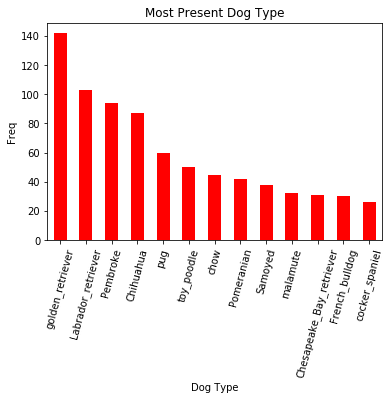

In [240]:
df_twitter['dog_prediction'].value_counts()
# Selecting dogs that appear 25 times or more and grouping by them
Top_dogs = df_twitter.groupby('dog_prediction').filter(lambda x: len(x) >= 25)
Top_dogs['dog_prediction'].value_counts().plot(kind = 'bar',color = 'r')
plt.xticks(rotation = 75)
plt.title('Most Present Dog Type')
plt.ylabel('Freq')
plt.xlabel('Dog Type')

### 2nd Visualizing Dog Types by their Average Ratings

In [262]:
df_twitter.groupby('dog_prediction').mean()

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,Nfollowers,Nfriends
dog_prediction,,,,,,,,
Afghan_hound,809599852776681472,8.000000,10.000000,8.000000,10616.000000,2950.000000,9.045266e+06,20.0
Airedale,718448940360117248,9.833333,10.000000,9.833333,4593.416667,1148.916667,9.045299e+06,20.0
American_Staffordshire_terrier,759728394572314624,10.312500,10.000000,10.312500,7352.400000,1697.533333,9.045266e+06,20.0
Appenzeller,793933403993278464,11.000000,10.000000,11.000000,6406.500000,1175.000000,9.045265e+06,20.0
Australian_terrier,778592105778309120,11.500000,10.000000,11.500000,9741.000000,2564.500000,9.045266e+06,20.0
Bedlington_terrier,784339478795524736,10.333333,10.000000,10.333333,22029.166667,6865.166667,9.045266e+06,20.0
Bernese_mountain_dog,757020062651367424,11.272727,10.000000,11.272727,6377.090909,1327.454545,9.045267e+06,20.0
Blenheim_spaniel,740440686413324672,11.100000,10.000000,11.100000,8091.000000,2124.800000,9.045268e+06,20.0
Border_collie,745794455517696000,10.583333,10.000000,10.583333,7825.833333,1828.333333,9.045267e+06,20.0


In [249]:
Avg_Dog_Rating = df_twitter.groupby('dog_prediction').mean()['rating'].sort_values(ascending=False)
Avg_Dog_Rating[0:25] #Picking only the Top 25

dog_prediction
Bouvier_des_Flandres          13.000000
Saluki                        12.500000
Irish_setter                  12.333333
briard                        12.333333
Border_terrier                12.142857
Tibetan_mastiff               12.000000
standard_schnauzer            12.000000
silky_terrier                 12.000000
Gordon_setter                 11.750000
Samoyed                       11.657895
golden_retriever              11.547055
Australian_terrier            11.500000
giant_schnauzer               11.500000
wire-haired_fox_terrier       11.500000
Great_Pyrenees                11.466667
Norfolk_terrier               11.428571
Eskimo_dog                    11.409091
Pembroke                      11.393617
chow                          11.377778
Leonberg                      11.333333
Irish_water_spaniel           11.333333
Greater_Swiss_Mountain_dog    11.333333
Doberman                      11.333333
kelpie                        11.307692
Bernese_mountain_dog     

**Insight here is Bouvier_des_Flandres is the Top Rated Dog with an average rating of 13.00**

**And that the least Rated dog is the Japanese spaniel with an average rating of 5.00**

Text(0,0.5,'Dog Type')

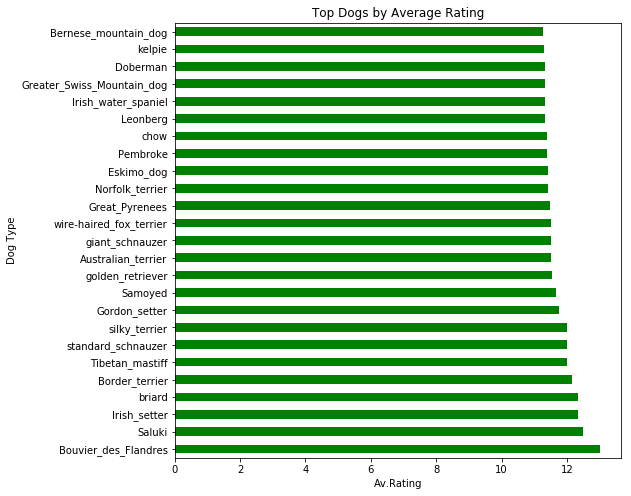

In [258]:
Avg_Dog_Rating[0:25].plot(kind='barh',color = 'g',figsize = (8,8))
plt.title('Top Dogs by Average Rating')
plt.xlabel('Av.Rating')
plt.ylabel('Dog Type')

### 3rd Ratings Vs Retweets

**We will create a scatter plot that compares Number of Retweets by the Average Rating of a dog and see if it correlates or not**

In [265]:
df_twitter.groupby('dog_prediction').mean()[['rating','retweet_count']]

,rating,retweet_count
dog_prediction,,
Afghan_hound,8.000000,2950.000000
Airedale,9.833333,1148.916667
American_Staffordshire_terrier,10.312500,1697.533333
Appenzeller,11.000000,1175.000000
Australian_terrier,11.500000,2564.500000
Bedlington_terrier,10.333333,6865.166667
Bernese_mountain_dog,11.272727,1327.454545
Blenheim_spaniel,11.100000,2124.800000
Border_collie,10.583333,1828.333333


In [266]:
RatingVsRetweet = df_twitter.groupby('dog_prediction').mean()[['rating','retweet_count']]

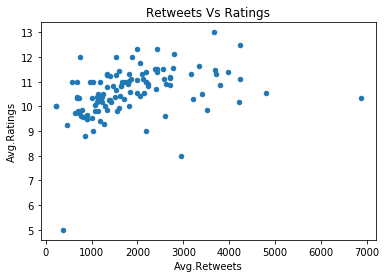

In [302]:
RatingVsRetweet.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Avg.Retweets')
plt.ylabel('Avg.Ratings')
plt.title('Retweets Vs Ratings')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

**This shows that Retweets most of the times correlate with high ratings but not always indicating a weak relationship**

### 4th The number of Retweets by Dog Age Period

In [289]:
df_twitter.groupby('dog_age').mean()['retweet_count'].sort_values(ascending = False)

dog_age
puppo      5959.238095
doggo      5562.980392
floofer    3927.125000
None       1957.741770
pupper     1879.380117
Name: retweet_count, dtype: float64

([<matplotlib.patches.Wedge at 0x7f86ef8efac8>,
 [Text(0.67766,0.990342,'Puppo'),
  Text(-1.0528,0.318782,'Doggo'),
  Text(-0.34494,-1.04452,'Floofer'),
  Text(0.656587,-0.882549,'None'),
  Text(1.04886,-0.331513,'Pupper')],
 [Text(0.395302,0.577699,'31%'),
  Text(-0.574252,0.173881,'29%'),
  Text(-0.188149,-0.569737,'20%'),
  Text(0.358139,-0.48139,'10%'),
  Text(0.572103,-0.180825,'10%')])

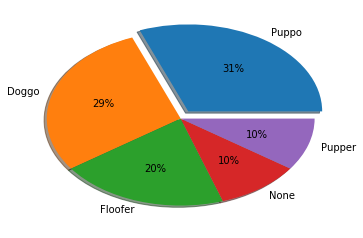

In [295]:
age_retweet = df_twitter.groupby('dog_age').mean()['retweet_count'].sort_values(ascending = False)
mylabels = ["Puppo","Doggo","Floofer","None","Pupper"]
explode = [0.1,0,0,0,0]

plt.pie(age_retweet ,labels = mylabels,autopct='%.0f%%',explode = explode, shadow = True)
